In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic = sns.load_dataset("titanic")
print(type(titanic))
titanic.to_csv("data/titanic.csv", index = False)

<class 'pandas.core.frame.DataFrame'>


In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [6]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [7]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [8]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [9]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [10]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [11]:
titanic['deck'] = titanic['deck'].fillna('C')

In [12]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

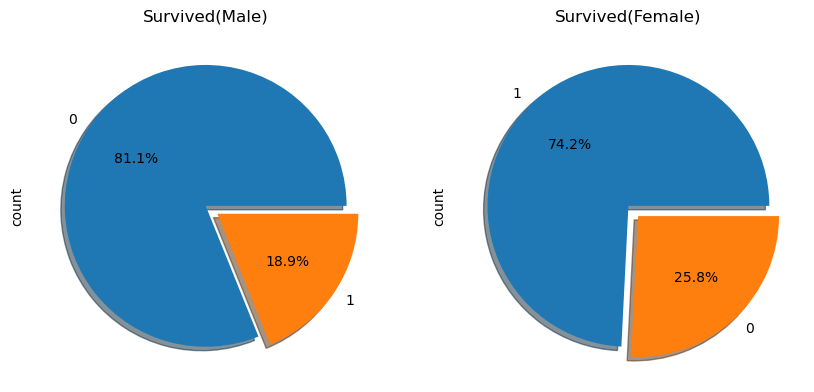

In [15]:
f, ax = plt.subplots(1,2,figsize = (10, 5))
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode =[0, 0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)                                     
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(explode =[0, 0.1], autopct='%1.1f%%', ax = ax[1], shadow=True)   

ax[0].set_title('Survived(Male)')
ax[1].set_title('Survived(Female)')

plt.show()

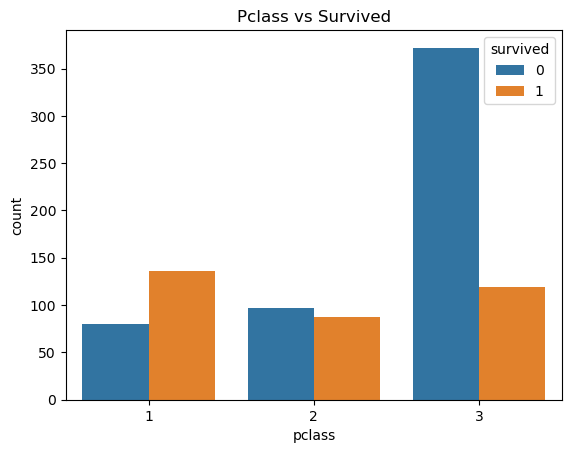

In [16]:
sns.countplot(x = 'pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

In [17]:
titanic['survived'].corr(titanic['adult_male'])

np.float64(-0.5570800422053258)

In [18]:
titanic['survived'].corr(titanic['fare'])

np.float64(0.25730652238496227)

In [19]:
titanic['survived'].corr(titanic['alone'])

np.float64(-0.20336708569989215)

In [20]:
import warnings
warnings.filterwarnings(action='ignore')

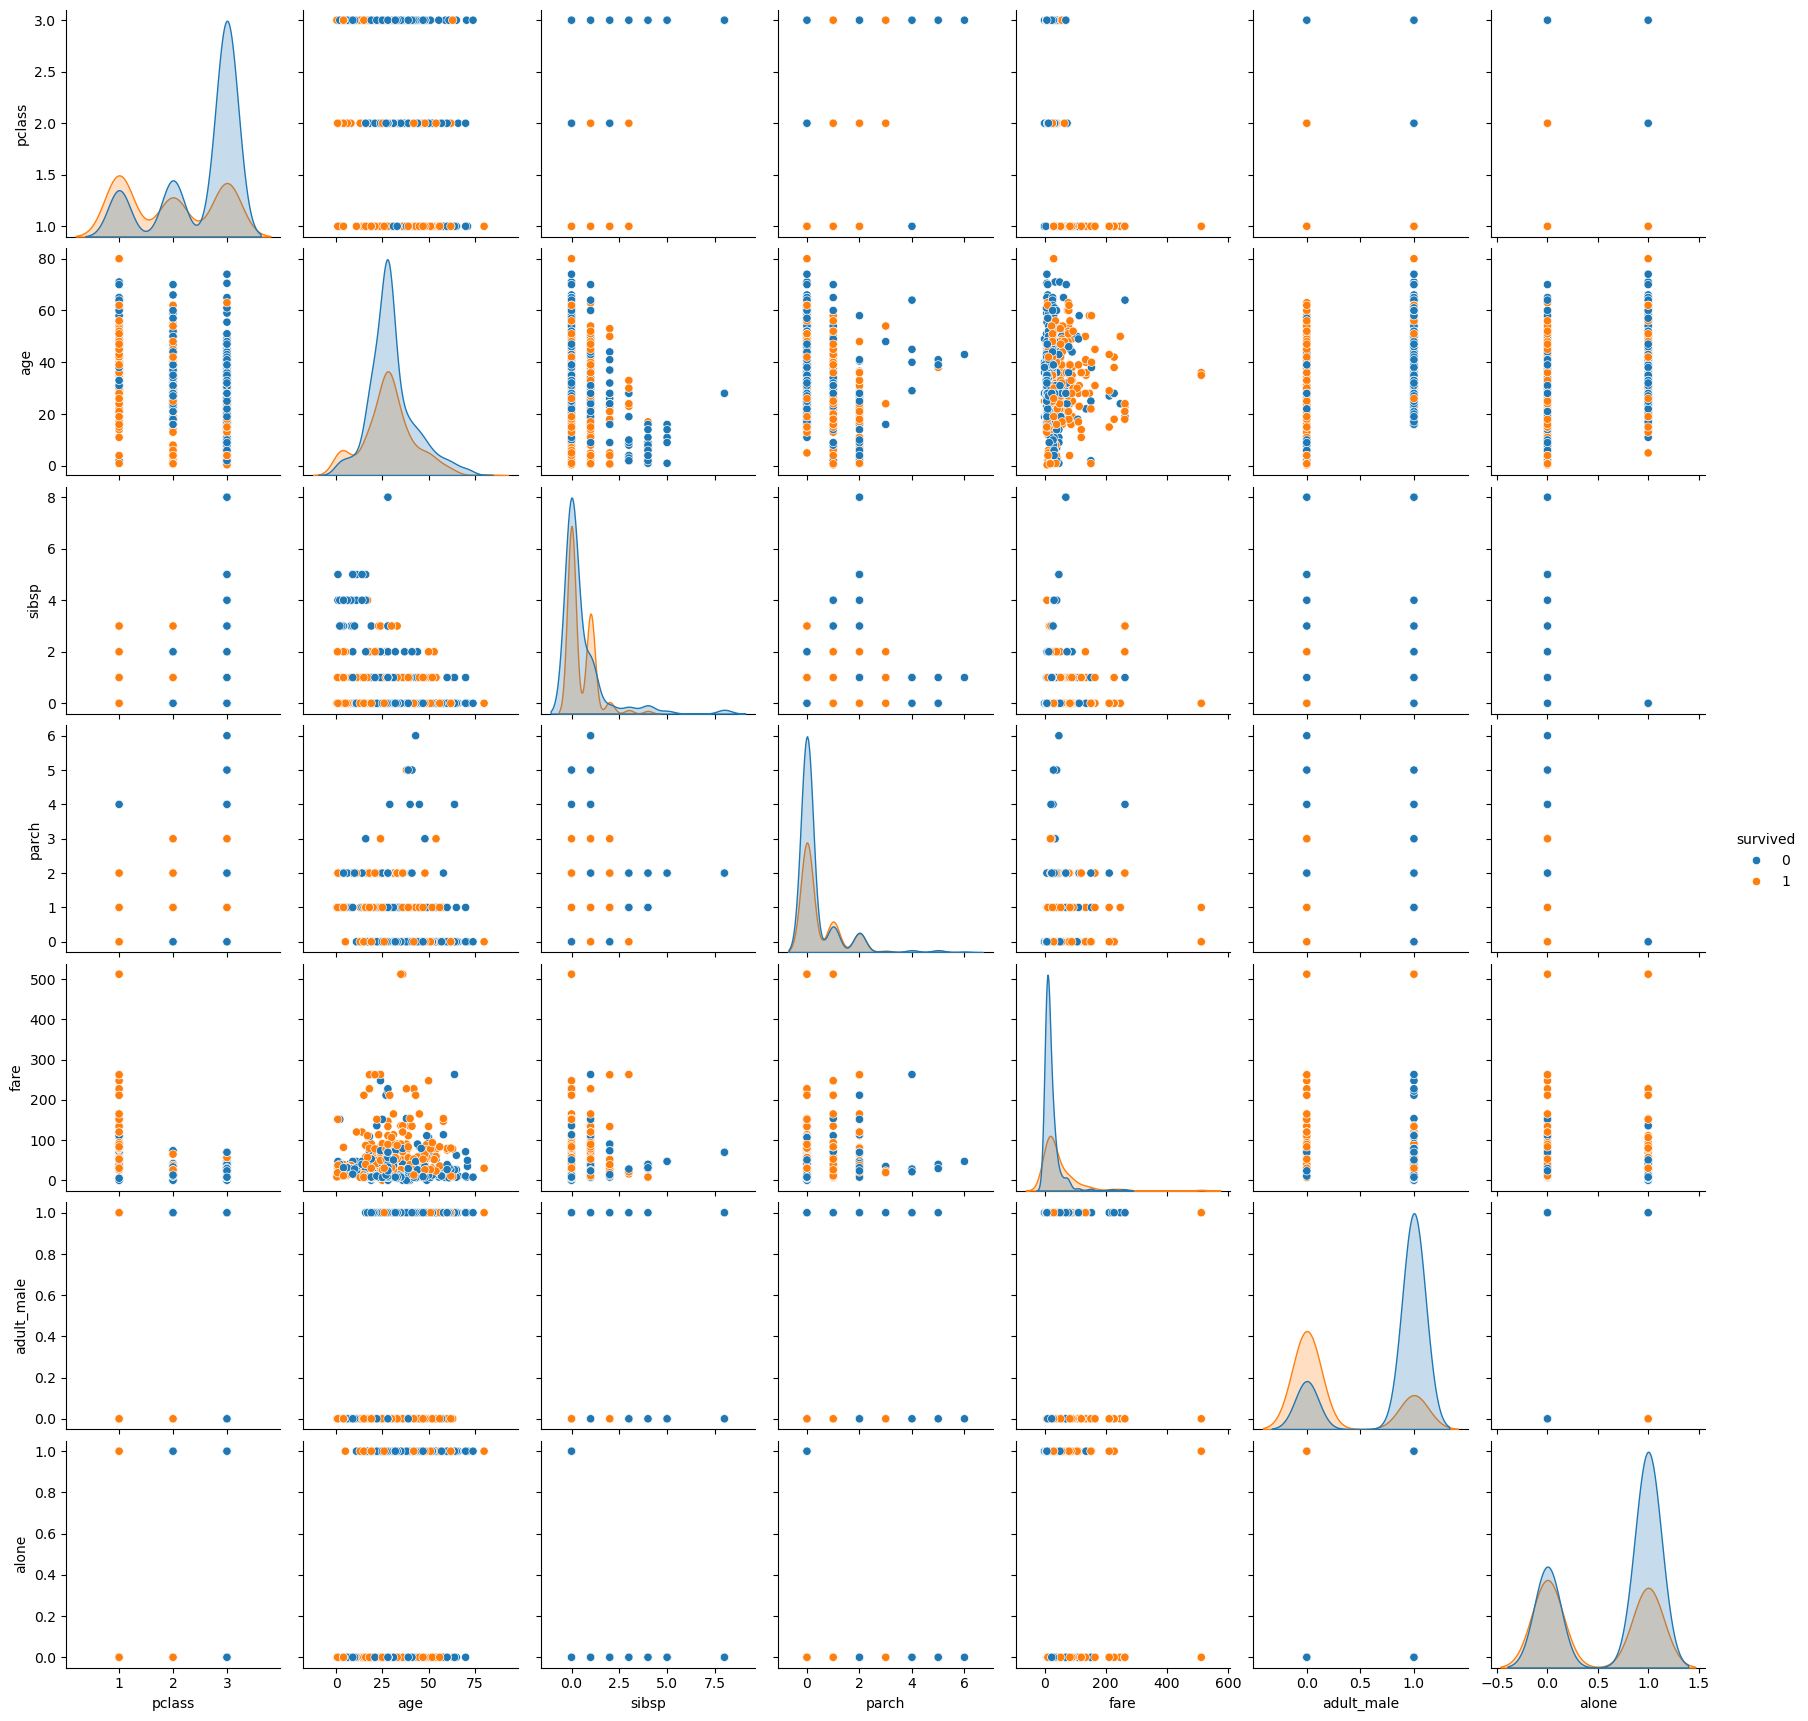

In [21]:
sns.pairplot(titanic, hue='survived')
plt.show()

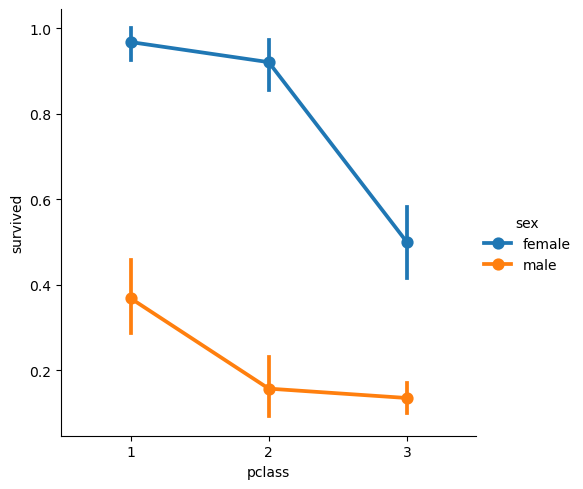

In [23]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
#범주별 데이터 그리기

In [24]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [25]:
titanic['age2'] = titanic['age'].apply(category_age)

In [26]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [27]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [28]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

In [29]:
colormap = plt.cm.RdBu

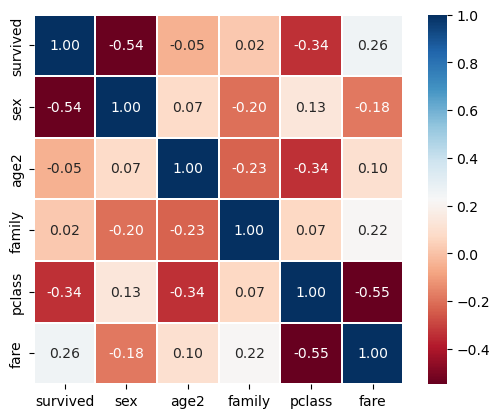

In [30]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, fmt='.2f',
annot_kws = {"size": 10})

plt.show()